# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [15]:
# import libraries
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import LinearSVC
from sqlalchemy import create_engine

In [2]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/oamadeus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/oamadeus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/oamadeus/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# load data from database
database_filepath = "../disaster_response/data/DisasterResponse.db"
engine = create_engine(f"sqlite:///{database_filepath}")

num_of_feature_cols = 4

df = pd.read_sql_table("DisasterResponse", engine)

X = df["message"]
Y = df[df.columns[num_of_feature_cols:]]

In [23]:
print(X[3])

UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.


In [22]:
Y

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26213,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26214,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
classes_names = Y.columns.tolist()

In [11]:
labels_dist = Y.sum(axis=0)

In [18]:
labels_dist.index

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

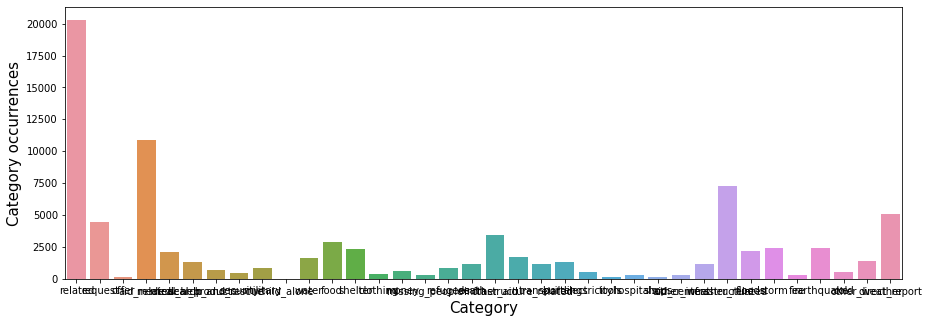

In [17]:
def plot_dist(data_dist, save_fig=False):
    """
    Plots seaborn barplot
    args: data_dist is a dictionary with trait name as key and it's occurences as value
          save_fig is boolean indicating if figure should be saved as png file
    """
    fig = plt.figure(figsize=(15,5))
    sns.barplot(data_dist.index, data_dist.values)
    plt.ylabel('Category occurrences', fontsize=15)
    plt.xlabel('Category', fontsize=15)
    
    if save_fig:
        fig.savefig('distribution.png')
        
plot_dist(labels_dist)

### 2. Write a tokenization function to process your text data

In [ ]:
def tokenize(text):
    lemmatizer = WordNetLemmatizer()
    
    tokens = word_tokenize(text)
    clean_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [ ]:
pipeline = Pipeline([
    ("c_vect", CountVectorizer(tokenizer=tokenize)),
    ("tfidf", TfidfTransformer()),
    ("clf", MultiOutputClassifier(RandomForestClassifier(n_estimators=200, verbose=1, n_jobs=-1))),
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

pipeline.fit(X_train, Y_train)

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [ ]:
def extract_macro_avg(report):
    splitted = [elem.strip() for elem in report.split("\n")]
    macro_avg = splitted[6].split()[4]
    
    return float(macro_avg)

In [ ]:
Y_pred = pipeline.predict(X_test)
macro_avg_list = []

for i in range(1, len(classes_names)):
    report = classification_report(Y_test.iloc[:, i].values, Y_pred[:, i], zero_division=1)
    macro_avg_list.append(extract_macro_avg(report))
    print("Category:", classes_names[i], "\n", report)

In [ ]:
overall_avg_score = sum(macro_avg_list) / len(macro_avg_list)
print(f"{overall_avg_score:.3}")

### 6. Improve your model
Use grid search to find better parameters. 

In [ ]:
parameters = {
#     "c_vect__ngram_range": ((1, 1), (1, 2)),
#     "c_vect__max_df": (0.75, 0.90, 1.0),
#     "c_vect__max_features": (5000, 10000),
#     "tfidf__use_idf": (True, False),
#     "tfidf__smooth_idf": (True, False),
#     "tfidf__sublinear_tf": (True, False),
    "clf__estimator__n_estimators": [300],
}

cv = GridSearchCV(pipeline, parameters)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
cv.best_estimator_

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class PosCounter(BaseEstimator, TransformerMixin):
    
    def pos_tagger(self, text):
        tokenized = tokenize(text)

        tagged = nltk.pos_tag(tokenized)

        part_of_speech_list = []

        for word_tag_pair in tagged:
            tag = word_tag_pair[1]
            if tag[0] == "V":
                part_of_speech_list.append("verb")
            elif tag[0] == "N":
                part_of_speech_list.append("noun")
            elif tag[0] == "J":
                part_of_speech_list.append("adjective")

        return part_of_speech_list
    
    def count_pos(self, l, pos):
        return l.count(pos)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X.apply(self.pos_tagger))
        
        for pos in ("verb", "noun", "adjective"):
            X[pos] = X["message"].apply(lambda l: self.count_pos(l, pos))

        del X['message']
        
        return X

In [ ]:
pc = PosCounter()
pc.transform(X)

In [ ]:
pipeline = Pipeline([
    ("features", FeatureUnion([
        ("nlp_pipeline", Pipeline([
            ("c_vect", CountVectorizer(tokenizer=tokenize, ngram_range=(1, 2), max_df=0.95)),
            ("tfidf", TfidfTransformer(use_idf=True, smooth_idf=True)),
        ])),

        ("pos_counter", PosCounter()),
    ])),
    ("clf", MultiOutputClassifier(LinearSVC(verbose=2, max_iter=100000))),
])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

pipeline.fit(X_train, Y_train)

In [ ]:
Y_pred = pipeline.predict(X_test)
macro_avg_list = []

for i in range(1, len(classes_names)):
    report = classification_report(Y_test.iloc[:, i].values, Y_pred[:, i], zero_division=1)
    macro_avg_list.append(extract_macro_avg(report))
    print("Category:", classes_names[i], "\n", report)

In [ ]:
overall_avg_score = sum(macro_avg_list) / len(macro_avg_list)
print(f"{overall_avg_score:.3}")

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.